In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import requests
import json
import pandas as pd

# Weights

**carto account:** wri-01  
**Table that holds weights:** water_risk_weights


This is divided on a set of predefined weights layers and a custom one:

|Weight indicator name |Weight indicator slug  |  preset weights |
|---|---|---| 
|Default weight overall water risk| _default | [4, 1, 0.5, 1, 1, 2, 2, 1, 0.5, 1, 2, 0.5] |
|Default weight physical risk quantity| def_pquant | [] |
|Default weight physical risk quality| def_pqual | [] |
|Default weight regulatory and reputational risk| def_regrep | [] |

* **Predifined weights layers**:  

|Weight indicator name |Weight indicator slug  |  preset weights |
|---|---|---| 
|Default weight overall water risk| _default | [4, 1, 0.5, 1, 1, 2, 2, 1, 0.5, 1, 2, 0.5] |  
|Default agriculture sector weight overall water risk| w_agr | [4, 2, 0.5, 1, 2, 2, 2, 0.5, 0.25, 0.25, 2, 1] |  
|Default power sector weight overall water risk| w_power | [4, 1, 2, 1, 4, 1, 1, 0.25, None, 0.5, 0.5, 2] |  
|Default semiconductor sector weight overall water risk| w_semico | [4, 1, 1, 1, 1, 2, 2, 4, 2, 2, 1, 2] |  
|Default oil and gas sector weight overall water risk| w_oilgas | [1, 0.5, 0.5, 0.5, 1, 1, 4, 0.25, None, 4, 4, 1] |  
|Default chemical sector weight overall water risk| w_chem | [2, 1, 1, 1, 4, 1, 2, 2, 0.5, 4, 4, 2] |  
|Default mining sector weight overall water risk| w_mine | [4, 1, 1, 4, 0.5, 1, 4, 1, 0.25, 4, 4, 1] |  
|Default food and beverage sector weight overall water risk| w_foodbv | [2, 1, 0.5, 0.5, 1, 2, 1, 2, 1, 2, 1, 0.5] |  
|Default construction materials sector weight overall water risk| w_constr | [4, 1, 0.5, 1, 1, 2, 2, 1, 0.5, 0.5, 1, 0.25] |  
|Default textile sector weight overall water risk| w_tex | [4, 1, 0.5, 1, 1, 2, 2, 2, 0.5, 1, 2, 0.5] |  


* **Custom weight layer calculated by the user**

## Predifined weights layers

Example query

``` sql
SELECT s.basinid, _default, r.the_geom_webmercator from water_risk_weights s left join wri_subcatchements r on s.basinid=r.basinid
``` 
```css
#water_risk_indicators{
  polygon-fill:transparent;
  polygon-opacity: 1;
  line-color:transparent;
  line-width: 1;
  line-opacity: 1;
}

#water_risk_indicators [ _default<1000] {
   polygon-fill:#B10026;
  line-color:#B10026
}
#water_risk_indicators [ _default<4] {
   polygon-fill:  #FC4E2A;
  line-color:  #FC4E2A
}
#water_risk_indicators [_default<3] {
   polygon-fill: #FD8D3C;
  line-color: #FD8D3C
}
#water_risk_indicators [_default<2] {
   polygon-fill: #FED976;
  line-color:  #FED976
}
#water_risk_indicators [_default<1] {
   polygon-fill: #FFFFB2;
  line-color:  #FFFFB2
}

#water_risk_indicators [_default=0] {
   polygon-fill: #eee;
  line-color:  #eee
}
``` 
Sql Template:
``` sql
SELECT s.basinid, {{weight_indicator}}, r.the_geom_webmercator from water_risk_weights s left join wri_subcatchements r on s.basinid=r.basinid
``` 

Cartocss:

```css
#water_risk_indicators{
  polygon-fill:transparent;
  polygon-opacity: 1;
  line-color:transparent;
  line-width: 1;
  line-opacity: 1;
}

#water_risk_indicators [ {{weight_indicator}}<1000] {
   polygon-fill:#B10026;
  line-color:#B10026
}
#water_risk_indicators [{{weight_indicator}}<4] {
   polygon-fill:  #FC4E2A;
  line-color:  #FC4E2A
}
#water_risk_indicators [{{weight_indicator}}<3] {
   polygon-fill: #FD8D3C;
  line-color: #FD8D3C
}
#water_risk_indicators [{{weight_indicator}}<2] {
   polygon-fill: #FED976;
  line-color:  #FED976
}
#water_risk_indicators [{{weight_indicator}}<1] {
   polygon-fill: #FFFFB2;
  line-color:  #FFFFB2
}

#water_risk_indicators [_default=0] {
   polygon-fill: #eee;
  line-color:  #eee
}
```

* parameters:   

``` json 

``` 

## Old custom weight layer calculated by the user
We have 12 indicators. Grouped in 3 categories. Which weight range values are: **[0.25, 0.5, 1, 2, 4]**   

This will cover the weight widget calculation and the weights passed to back to generate the custom layer.   

### Weight widget data calculation

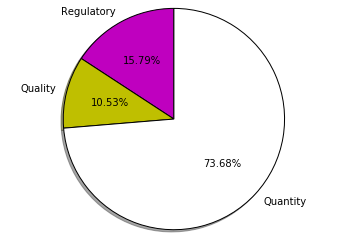

In [3]:
# Agrupation [  regulatory   ] [  Quality  ] [             Quantity                 ]
#  indicator [ 1     2     3 ] [ 4      5  ] [   6      7     8     9   10   11  12 ]
weights = [[0.25, 0.25, 0.25], [0.25, 0.25], [0.25, 0.25, 0.25, 0.25, 2, 0.25, 0.25]]
#calculation
total = (np.sum(weights[0]) + np.sum(weights[1]) + np.sum(weights[2]))
regulatory = (np.sum(weights[0]) / total)*100
quality = (np.sum(weights[1]) / total)*100
quantity = (np.sum(weights[2]) / total)*100
#vissual
labels = 'Regulatory', 'Quality', 'Quantity'
theta = ('m', 'y', 'w')
sizes = [regulatory, quality, quantity]
explode = (0, 0, 0, 0)
fig1, ax1 = plt.subplots()
ax1.pie(sizes,  labels=labels, autopct='%1.2f%%', colors=theta, shadow=True, startangle=90)
ax1.axis('equal')

plt.show()

## Weight passed to back for the custom weight layer;

Procedure definition:

``` sql
DROP FUNCTION get_custom_weight(weights_raw TEXT); 

DROP TYPE weight_water_risk;

CREATE TYPE weight_water_risk AS (cartodb_id numeric, basinid numeric, the_geom geometry, the_geom_webmercator geometry, water_risk numeric);

CREATE OR REPLACE FUNCTION get_custom_weight(weights_raw TEXT) 
	RETURNS SETOF weight_water_risk as $$
	DECLARE
    query1 TEXT;
    weights TEXT;
    weights_sum TEXT;
	BEGIN
        query1:='select array_to_string(array_agg(col::text ||''*''|| weights::text), ''+ '') as weights, sum(weights)::text as weights_sum from (select unnest(Array'|| weights_raw||') as weights, unnest(array[''bws_s'', ''wsv_s'', ''sv_s'', ''hfo_s'', ''dro_s'', ''stor_s'', ''gw_s'', ''wri_s'', ''eco_s_s'', ''mc_s'', ''wcg_s'', ''eco_v_s'']) as col) as tables where weights is not null';
        EXECUTE query1 into weights, weights_sum;
        
		RETURN query EXECUTE 'with ranges as (select basinid, average, min(average) over (), max(average) over () from (SELECT basinid, ('|| weights ||')/('|| weights_sum ||') as average FROM water_risk_weights) initial) select cartodb_id::numeric, ranges.basinid::numeric, the_geom, the_geom_webmercator, (((average-min)/(max-min))*5)::numeric as water_risk from ranges left join wri_subcatchements on ranges.basinid=wri_subcatchements.basinid';
	
	END
$$ language 'plpgsql';

``` 



### Old indicators order
[New Indicators list reference](https://docs.google.com/spreadsheets/d/11GWSY4HZdskCFoVpGCTmzMw8evifIZfHDi6_UaoGQFE/edit#gid=0)

| Family |Indicator name| slug |
|---|---|--- |
| Physical Risk Quantity |Baseline Water Stress  | water_stress |
| Physical Risk Quantity |Interannual Variability  |  interannual_variability |
| Physical Risk Quantity |Seasonal Variability  | seasonal_variability  |
| Physical Risk Quantity |Flood Occurrence  |  flood_occurrence |
| Physical Risk Quantity |Drought Severity  | drought_severity  |
| Physical Risk Quantity |Upstream Storage  | upstream_storage |
| Physical Risk Quantity |Groundwater Stress  | groundwater_stress|
| Physical Risk Quality |Return Flow Ratio  | return_flow_ratio |
| Physical Risk Quality |Upstream Protected Land  | upstream_protected_land |
| Regulatory & Reputational Risk |Media Coverage   |media_coverage  |
| Regulatory & Reputational Risk |Access to Water   |access_to_water  |
| Regulatory & Reputational Risk |Threatened Amphibians  |threatened_amphibians|



Sql:
``` sql
select * from get_custom_weight('[4, 1, 0.5, 1, 1, 2, 2, 1, 0.5, 1, 2, 0.5]')

``` 

Cartocss:

```css
#water_risk_indicators{
  polygon-fill:transparent;
  polygon-opacity: 1;
  line-color:transparent;
  line-width: 1;
  line-opacity: 1;
}

#water_risk_indicators [ water_risk<1000] {
   polygon-fill:#B10026;
  line-color:#B10026
}
#water_risk_indicators [ water_risk<4] {
   polygon-fill:  #FC4E2A;
  line-color:  #FC4E2A
}
#water_risk_indicators [water_risk<3] {
   polygon-fill: #FD8D3C;
  line-color: #FD8D3C
}
#water_risk_indicators [water_risk<2] {
   polygon-fill: #FED976;
  line-color:  #FED976
}
#water_risk_indicators [water_risk<1] {
   polygon-fill: #FFFFB2;
  line-color:  #FFFFB2
}

#water_risk_indicators [water_risk=0] {
   polygon-fill: #eee;
  line-color:  #eee
}
```

* parameters:   

``` json 

``` 



In [4]:
payload = {'q': "SELECT * FROM get_custom_weight('[4, 1, 0.5, 1, 1, 2, 2, 1, 0.5, 1, 2, 0.5]') Limit 1"}
r = requests.get('https://wri-01.carto.com/api/v2/sql', params=payload)

tableStructure= pd.read_json(json.dumps(r.json()['rows']), orient='records')
tableStructure.head(1)

,basinid,cartodb_id,the_geom,the_geom_webmercator,water_risk
0,14559,1374,0106000020E61000000100000001030000000100000087...,0106000020110F00000100000001030000000100000087...,6.676809


# Anexe: weights table query creation:

``` sql

```


In [1]:
columns = ['BWS_s', 'WSV_s', 'SV_s', 'HFO_s', 'DRO_s', 'STOR_s', 'GW_s', 'WRI_s', 'ECO_S_s', 'MC_s', 'WCG_s', 'ECO_V_s', '_DEFAULT', 'DEF_PQUANT', 'DEF_PQUAL', 'DEF_REGREP', 'W_AGR', 'W_POWER', 'W_SEMICO', 'W_OILGAS', 'W_CHEM', 'W_MINE', 'W_FOODBV', 'W_CONSTR', 'W_TEX']
cols=[]
for x in columns: 
    cols.append(x.lower())
'select basinid, ' + ', '.join(cols)  + ' from aqueduct_global_dl_20150409'

'select basinid, bws_s, wsv_s, sv_s, hfo_s, dro_s, stor_s, gw_s, wri_s, eco_s_s, mc_s, wcg_s, eco_v_s, _default, def_pquant, def_pqual, def_regrep, w_agr, w_power, w_semico, w_oilgas, w_chem, w_mine, w_foodbv, w_constr, w_tex from aqueduct_global_dl_20150409'

update columns to get ride of value -32767 
```sql
update water_risk_weights set {{indicator}}=null where {{indicator}}=-32767
``` 

In [7]:
for indicator in cols:
    print('update water_risk_weights set '+indicator+'=0 where '+indicator+' is null;')

update water_risk_weights set bws_s=0 where bws_s is null;
update water_risk_weights set wsv_s=0 where wsv_s is null;
update water_risk_weights set sv_s=0 where sv_s is null;
update water_risk_weights set hfo_s=0 where hfo_s is null;
update water_risk_weights set dro_s=0 where dro_s is null;
update water_risk_weights set stor_s=0 where stor_s is null;
update water_risk_weights set gw_s=0 where gw_s is null;
update water_risk_weights set wri_s=0 where wri_s is null;
update water_risk_weights set eco_s_s=0 where eco_s_s is null;
update water_risk_weights set mc_s=0 where mc_s is null;
update water_risk_weights set wcg_s=0 where wcg_s is null;
update water_risk_weights set eco_v_s=0 where eco_v_s is null;
update water_risk_weights set _default=0 where _default is null;
update water_risk_weights set def_pquant=0 where def_pquant is null;
update water_risk_weights set def_pqual=0 where def_pqual is null;
update water_risk_weights set def_regrep=0 where def_regrep is null;
update water_risk_